In [ ]:
#Descriptiion: This program detects Breast Cancer, based off of data

In [8]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(10)

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [9]:
#Count the number of rows and coloumns in the data set
df.shape

(569, 33)

In [10]:
#Count the number of empty (NaN, NAN, na) values in each coloumns
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [11]:
#Drop the coloumn with all missing values
df = df.dropna(axis=1)

In [12]:
#Get the new count of the number of rows and coloumns
df.shape

(569, 32)

In [13]:
#Get the count of the number of Malignant(M) or Benign(B) cells
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


<Axes: xlabel='count', ylabel='diagnosis'>

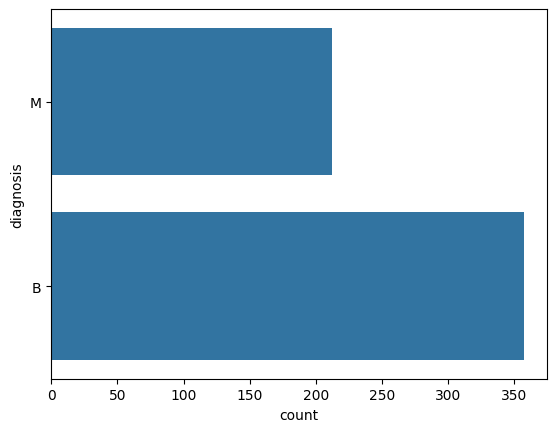

In [14]:
#Visualize the count
sns.countplot(df['diagnosis'], label='count')

In [15]:
#Look at the data types to see which coloumns need to be encoded
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [16]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)



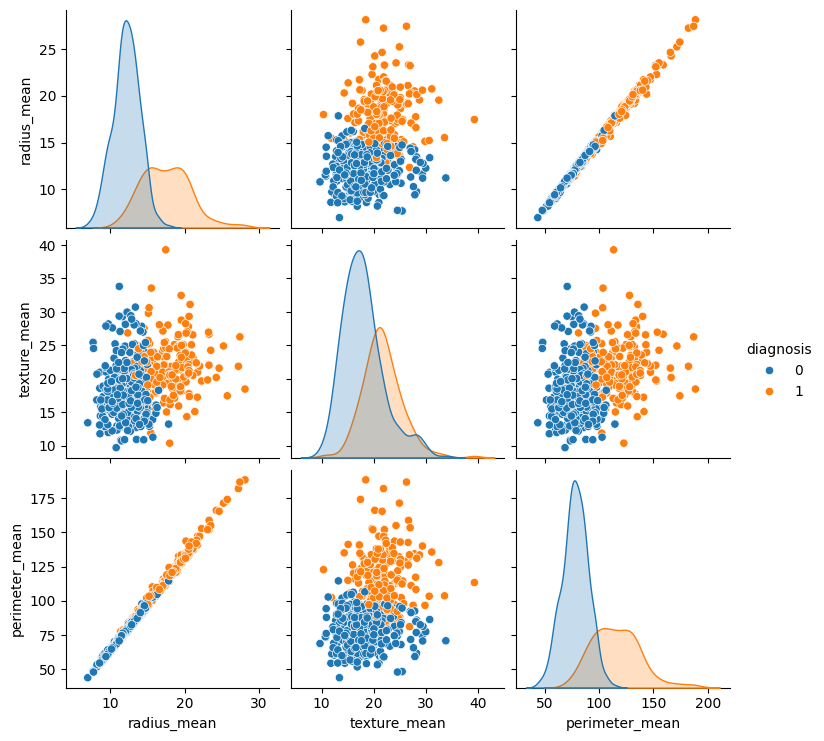

In [17]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue = 'diagnosis')

In [18]:
#print the first 5 rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
#Get the correlation of the coloumns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

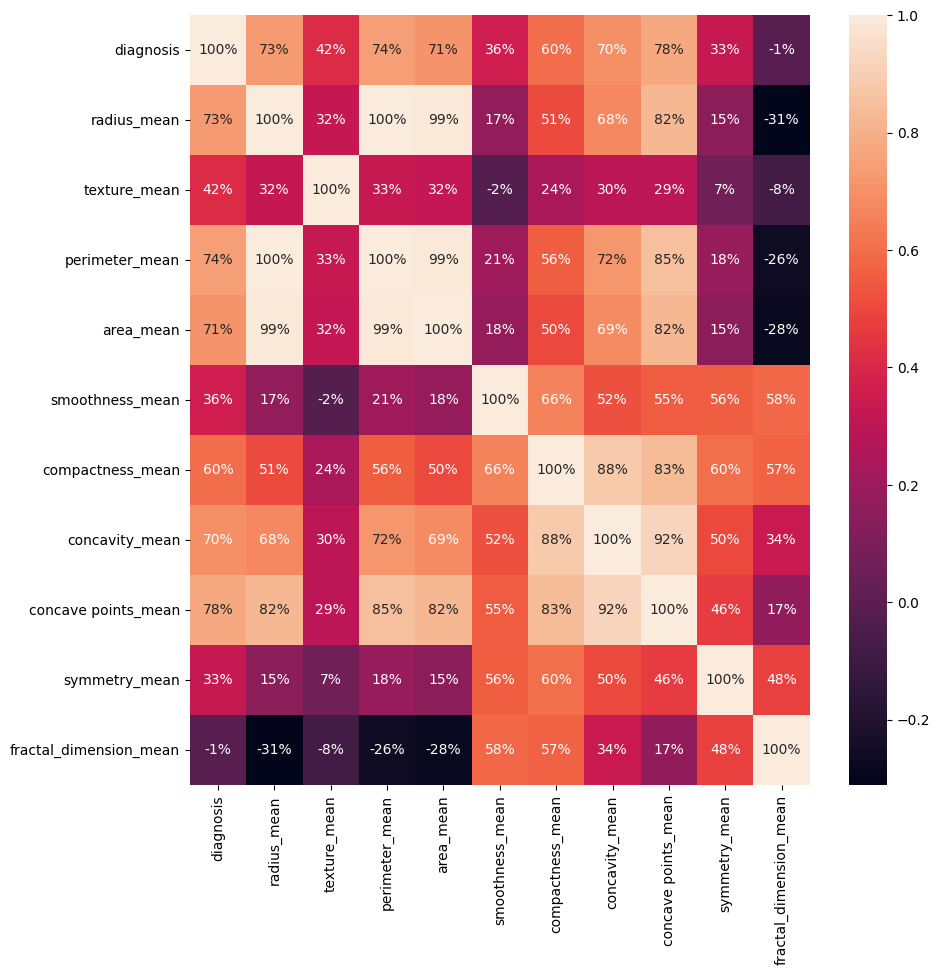

In [20]:
#Visualize the Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [32]:
#Split the data set into independent (X) and dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values
# Ensure Y is of integer type
Y = Y.astype(int)


In [33]:
#Split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [34]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [37]:

#Create a finction for the models
def models(X_train, Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)


  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Print the models accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Logistic Regression Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Logistic Regression Training Accuracy:', forest.score(X_train, Y_train))

  return log, tree, forest

In [38]:
#Getting all of the models
model = models(X_train, Y_train)


[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Logistic Regression Training Accuracy: 1.0
[2]Logistic Regression Training Accuracy: 0.9953051643192489


In [39]:
#Test model on accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing accuracy = ', (TP + TN)/ (TP +TN +FN +FP))
  print()


Model  0
[[86  4]
 [ 3 50]]
Testing accuracy =  0.951048951048951

Model  1
[[83  7]
 [ 2 51]]
Testing accuracy =  0.9370629370629371

Model  2
[[87  3]
 [ 2 51]]
Testing accuracy =  0.965034965034965



In [40]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
  print('Model ', i)
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted

In [41]:
#Print the prediction of the random forest classifier model
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(Y_test, pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(Y_test, pred)
print("\nClassification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.965034965034965

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143


Confusion Matrix:
 [[87  3]
 [ 2 51]]


In [44]:
# Generate predictions using the Random Forest Classifier
pred = model[2].predict(X_test)

# Print the predictions and actual values for comparison
print("Predictions:", pred)
print()
print("Actual Values:", Y_test.tolist())

# Importing required library for classification report
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report and convert it into a DataFrame
report = classification_report(Y_test, pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print the classification report as a DataFrame
print("\nClassification Report (Tabular Format):")
print(report_df)

# Adding a meaningful conclusion
print("\nKey Insights:")
print(f"Precision for Class 0 (Benign): {report_df.loc['0', 'precision']:.2f}")
print(f"Recall for Class 0 (Benign): {report_df.loc['0', 'recall']:.2f}")
print(f"F1-Score for Class 0 (Benign): {report_df.loc['0', 'f1-score']:.2f}")
print(f"Precision for Class 1 (Malignant): {report_df.loc['1', 'precision']:.2f}")
print(f"Recall for Class 1 (Malignant): {report_df.loc['1', 'recall']:.2f}")
print(f"F1-Score for Class 1 (Malignant): {report_df.loc['1', 'f1-score']:.2f}")
print("\nOverall Model Performance:")
print(f"Accuracy (Weighted Avg): {report_df.loc['accuracy', 'precision']:.2f}")

Predictions: [1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

Actual Values: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]

Classification Report (Tabular Format):
              precision    recall  f1-score     support
0              0.977528  0.966667  0.972067   90.000000
1              0.944444  0.962264  0.953271   53.000000
accuracy       0.965035  0.965035  0.9650

In [45]:
# Print the key results in a meaningful way
print("\n--- Final Summary of the Breast Cancer Classification Project ---\n")
print(f"1. Model Accuracy: {accuracy:.2%}")
print("2. Classification Report Summary:")
print(f"   - Precision for Class 0 (Benign): {report_df.loc['0', 'precision']:.2f}")
print(f"   - Precision for Class 1 (Malignant): {report_df.loc['1', 'precision']:.2f}")
print(f"   - Recall for Class 0 (Benign): {report_df.loc['0', 'recall']:.2f}")
print(f"   - Recall for Class 1 (Malignant): {report_df.loc['1', 'recall']:.2f}")
print("\n3. Key Insights from Confusion Matrix:")
print(f"   - True Positives: {conf_matrix[1, 1]}")
print(f"   - True Negatives: {conf_matrix[0, 0]}")
print(f"   - False Positives (Type I Error): {conf_matrix[0, 1]}")
print(f"   - False Negatives (Type II Error): {conf_matrix[1, 0]}")

print("\nThe model demonstrates high accuracy and robust performance in distinguishing between benign and malignant breast cancer cases.")
print("This project highlights the effectiveness of Machine Learning algorithms in the healthcare domain for predictive diagnostics.")


--- Final Summary of the Breast Cancer Classification Project ---

1. Model Accuracy: 96.50%
2. Classification Report Summary:
   - Precision for Class 0 (Benign): 0.98
   - Precision for Class 1 (Malignant): 0.94
   - Recall for Class 0 (Benign): 0.97
   - Recall for Class 1 (Malignant): 0.96

3. Key Insights from Confusion Matrix:
   - True Positives: 51
   - True Negatives: 87
   - False Positives (Type I Error): 3
   - False Negatives (Type II Error): 2

The model demonstrates high accuracy and robust performance in distinguishing between benign and malignant breast cancer cases.
This project highlights the effectiveness of Machine Learning algorithms in the healthcare domain for predictive diagnostics.
